# AnTeDe Word Embeddings Lab - Basics

## Session goal

Here we familiarize ourselves with some key basic concepts.

**Sigmoid function.**
Let's begin by taking a closer look at the sigmoid function.

Text(0.5, 0, 'x')

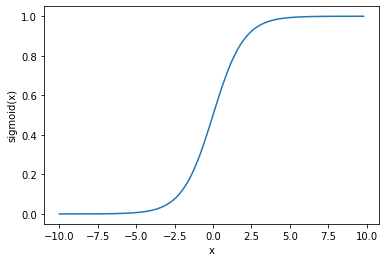

In [299]:
import numpy as np
sigmoid = lambda x:(1+np.exp(-x))**(-1)  

import matplotlib.pyplot as plt

x = np.arange(-10., 10., 0.2)
plt.plot(x, sigmoid(x))

plt.ylabel('sigmoid(x)')
plt.xlabel('x')

**Cross-entropy loss** Now let's play with the cross-entropy loss function. If *yh* is close to *y*, the loss is small. If you decrease $yh$ down to 0, you'll see the loss increase.

In [300]:
y=1
yh=0.9999
-(y*np.log(yh)+(1-y)*np.log(1-sigmoid(yh)))

0.00010000500033334732

Let's plot the cross-entropy loss function.

Text(0.5, 0, 'Prediction yh')

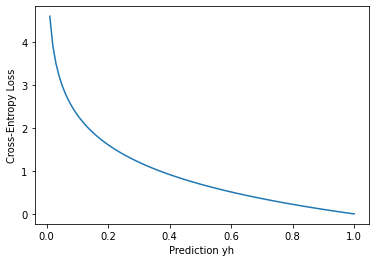

In [301]:
yh = np.linspace(0.01, 1, 100)
loss = -(y*np.log(yh)+(1-y)*np.log(1-sigmoid(yh)))
plt.plot(yh, loss)
plt.ylabel('Cross-Entropy Loss')
plt.xlabel('Prediction yh')

**Softmax** Let's look at an example of what the softmax function does to an array.

In [302]:
from scipy.special import softmax
softmax ([0, 12, -10, 20])

array([2.06046241e-09, 3.35350130e-04, 9.35448487e-14, 9.99664648e-01])

**Neural Networks** Here's a toy example of a neural network, based on a set of examples written by Andrew Trask. 

If you're completely new to neural networks, please read the original articles by Andrew Trask: http://iamtrask.github.io/2015/07/12/basic-python-network/
https://iamtrask.github.io/2015/07/27/python-network-part2/

If you've already been exposed to neural networks, you will be able to understand what's happening based on the code. Try to investigate the effects of the various parameters on the output.

In [303]:
def generate_dataset(columns, examples=10, verbose=True):
    X = np.random.rand(examples, columns)
    if verbose:
        print ('-'*30)
        print (X)
       
    y = (np.sum(X, axis=1)/columns).T.reshape(examples, 1)
    y=y**2
    
    if verbose:
        print ('-'*30)
        print (y)
    return X, y   

In [304]:
X, y = generate_dataset(2, 2)

------------------------------
[[0.64436108 0.00523984]
 [0.48442845 0.85931781]]
------------------------------
[[0.10549534]
 [0.4514135 ]]


In [ ]:
N_steps = 5000
columns = 5
hidden_size = 8
examples = 1000
alpha=0.01

np.random.seed(1)

X, y = generate_dataset(columns, examples, verbose=False)

W0 = 2*np.random.random((columns, hidden_size)) - 1
W1 = 2*np.random.random((hidden_size, 1)) - 1


for j in range(N_steps):
    
    l1 = 1/(1+np.exp(-(np.dot(X, W0))))
    l2 = 1/(1+np.exp(-(np.dot(l1, W1))))
    
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(W1.T) * (l1 * (1-l1))
    
    W1 += alpha*(l1.T.dot(l2_delta))
    W0 += alpha*(X.T.dot(l1_delta))


In [ ]:
X, y = generate_dataset(columns, 4)

l1 = 1/(1+np.exp(-(np.dot(X, W0))))
l2 = 1/(1+np.exp(-(np.dot(l1, W1))))

print ('-'*30)
print ('Output')
print (l2)

Here's a great follow-up example, also by Andrew Trask. 
https://iamtrask.github.io/2015/07/27/python-network-part2/